In [1]:
import torch
import sys
from matplotlib import gridspec
from matplotlib import pyplot as plt
sys.path.append('../src')
from score_util_pub import *
from inference import *
import json
import gabor

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


/home/grads/xiaoyanzang24/miniconda3/envs/C3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Generator('sdxl-light-1')

seed = 42
amplification_factor = [1.0]*7

# You can manually select amplification factor for each block 

amplification_factor[0] = 1.1 # amp factor for down 0 block
amplification_factor[1] = 1.3 # amp factor for down 1 block
amplification_factor[2] = 1.6 # amp factor for down 2 block
amplification_factor[3] = 1.8 # amp factor for middle block

# Or you can use the automatically found params
# Please note that the automatically found params are searched for each block 
# and needs to be further scaled to be used in combination.

# file_path = f'./results/sdxl-light-1/house/amp_factors_80.json'
file_path = f'../results/amp_factors_80.json'
with open(file_path, 'r') as file:
    data = json.load(file)
amplification_factor[0] = 1+(data[0][0]-1)*0.2
amplification_factor[1] = 1+(data[0][1]-1)*0.2
amplification_factor[2] = 1+(data[0][2]-1)*0.1
amplification_factor[3] = 1+(data[0][3]-1)*0.1

/home/grads/xiaoyanzang24/cv/C3/diffusers/src/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


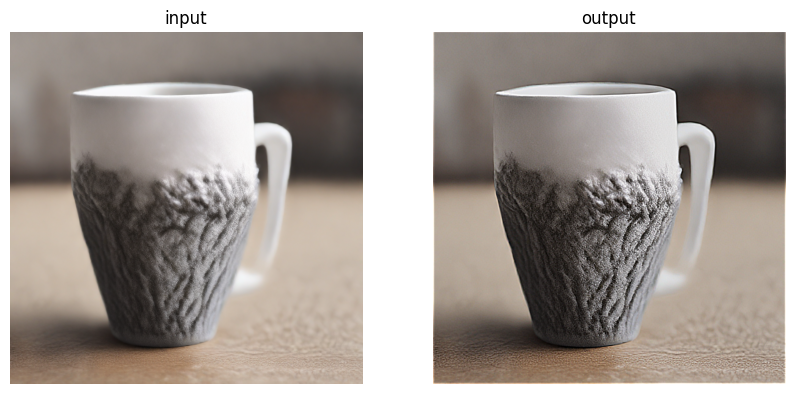

In [3]:
prompt = 'a creative cup'
orig = model.orig(prompt=prompt, seed=seed)

input = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])

output = gabor.apply_gabor(input, filter_factor=10.0)

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.imshow(input)
ax1.axis('off')
ax1.set_title('input')

ax2.imshow(output)
ax2.axis('off')
ax2.set_title('output')

fig.savefig('gabor_result.svg', format='svg', bbox_inches='tight')

plt.show()